Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
titanic = pd.read_csv('train.csv')

print("Інформація про датафрейм:")
print(titanic.info())

# Перші кілька рядків
print("\nПерші 5 рядків датафрейму:")
print(titanic.head())

Інформація про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Перші 5 рядків датафрейму:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4    

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

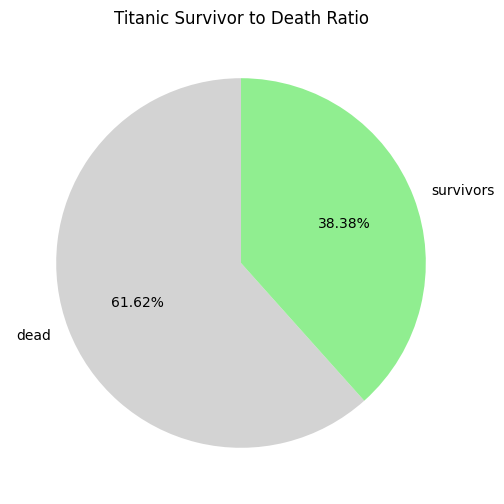

In [30]:
survived_counts = titanic['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(survived_counts, labels=['dead', 'survivors'], autopct='%1.2f%%', startangle=90, colors=['lightgray', 'lightgreen'])
plt.title('Titanic Survivor to Death Ratio')
plt.show()

За діаграмою можна сказати, що вижиоло значно менше людей, ніж загинуло. 61.62% пасажирів більше не повернулися додому

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


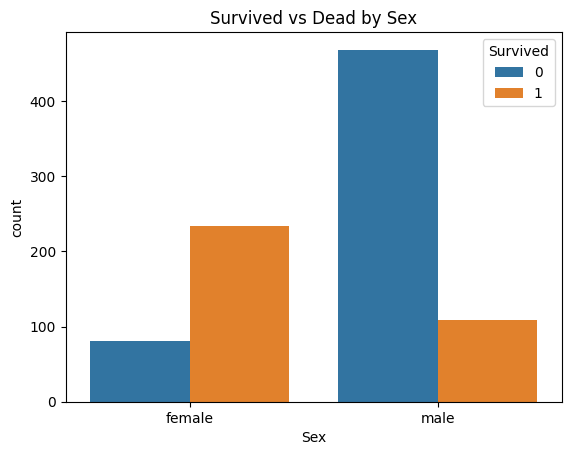

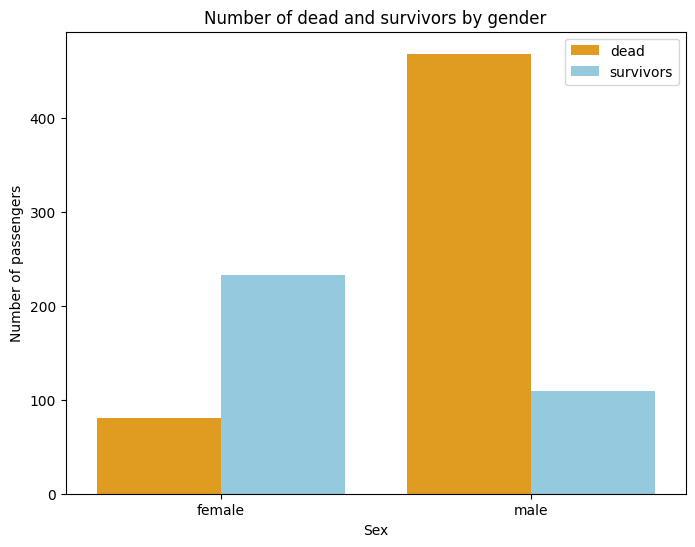

In [32]:
gender_survived = titanic.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(8,6))
bars = sns.barplot(x='Sex', y='size', hue='Survived', data=gender_survived, palette=['orange', 'skyblue'])
plt.title('Number of dead and survivors by gender')
plt.ylabel('Number of passengers')
plt.xlabel('Sex')
handles, labels = bars.get_legend_handles_labels()
plt.legend(handles=handles, labels=['dead', 'survivors'])

plt.show()

Графік демонструє, що серед чоловіків значно більше загиблих, ніж виживших, а серед жінок все навпаки - вижило більше ніж загинуло. Це зумовлено тим, що в рятувальні човни першими брали жінок та дітей.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

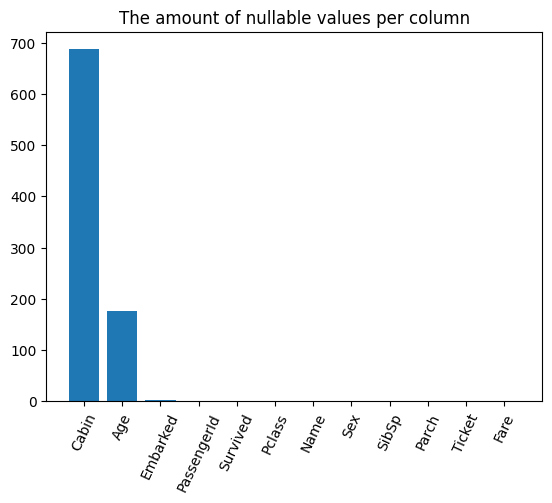

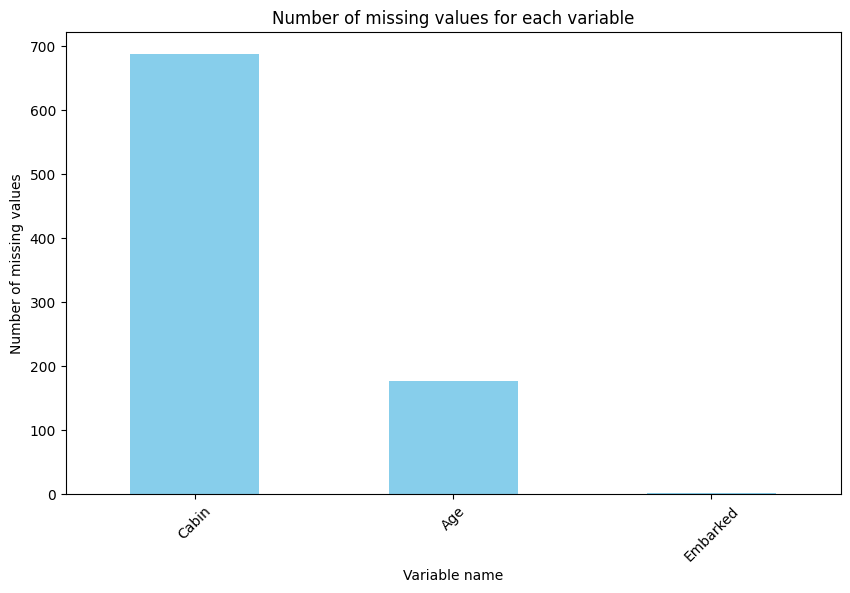

In [33]:
missing_values = titanic.isnull().sum()

plt.figure(figsize=(10,6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of missing values ​​for each variable')
plt.xlabel('Variable name')
plt.ylabel('Number of missing values')
plt.xticks(rotation=45)
plt.show()

Найбільша кількість пропущених значень у змінній Cabin, Age та Embarked. Це може вплинути на дослідження, якщо воно буде стосуватися віку пасажирів, їх каюти, або порту звідки відбулась посадка

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

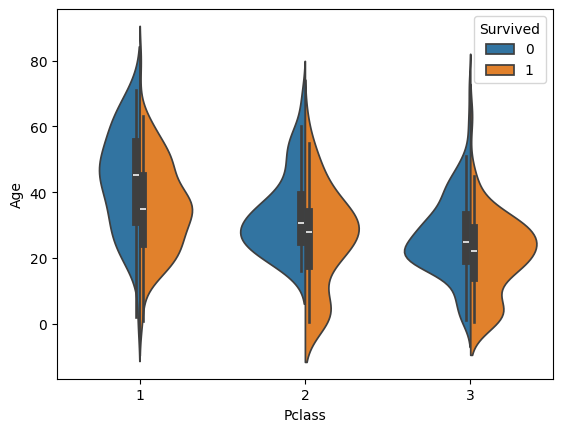

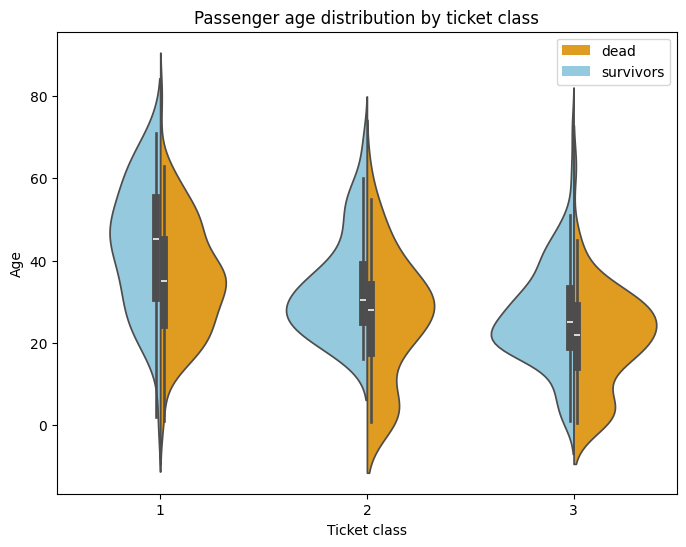

In [39]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic, split=True, palette={0: 'skyblue', 1: 'orange'})
plt.title('Passenger age distribution by ticket class')
plt.xlabel('Ticket class')
plt.ylabel('Age')
plt.legend(handles=handles, labels=['dead', 'survivors'])
plt.show()

Пасажири першого класу мали набагато вищі шанси на виживання порівняно з пасажирами другого та особливо третього класів. Також графік свідчить, що переважно люди від 20 до 40 років купували білети 2 та 3 класу. (або люди 20-40 років складали переважну більшість серед пасажирів)

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


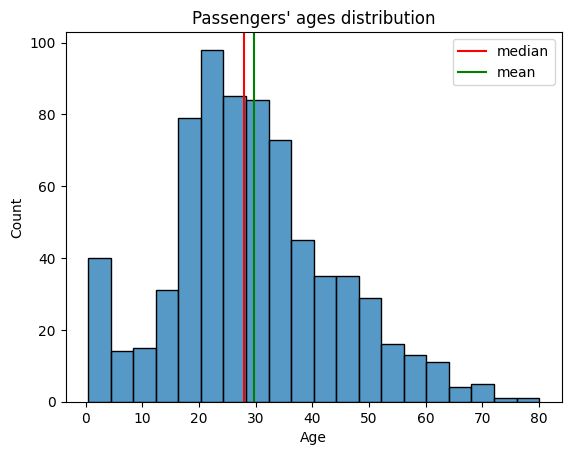

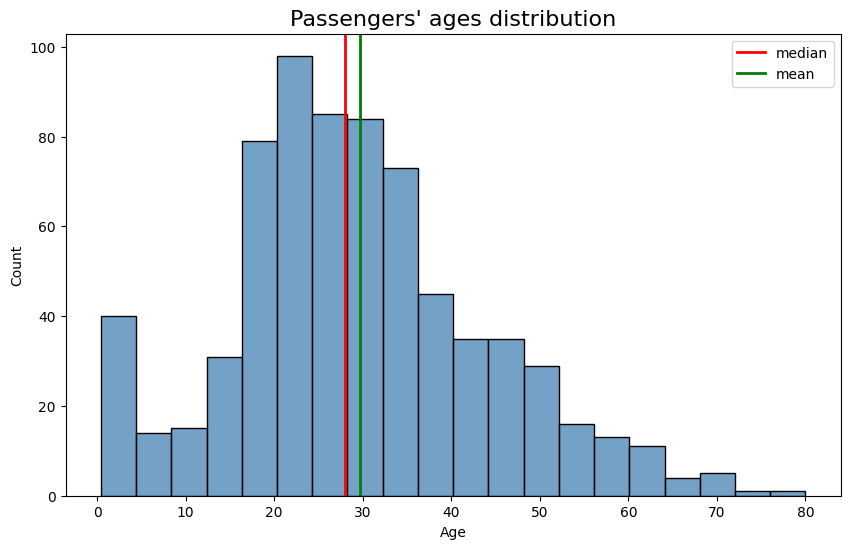

In [41]:
plt.figure(figsize=(10,6))

sns.histplot(titanic['Age'].dropna(), bins=20, kde=False, color='steelblue', edgecolor='black')
plt.axvline(titanic['Age'].median(), color='red', linestyle='-', linewidth=2, label='median')
plt.axvline(titanic['Age'].mean(), color='green', linestyle='-', linewidth=2, label='mean')

plt.title("Passengers' ages distribution", fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

На графіку зображено, що більшість пасажирів були у віці від 20 до 40 років. Червона вертикальна лінія вказує на медіану віку 28 років, а зелена — на середнє значення - 30 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи вплинула в теорії вартість квитка на шанс людини на виживання?

Чи впливав вік пасажира на його шанси вижити?

Який відсоток дітей серед вижило?

<ipython-input-52-55ed3913e399>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=titanic, palette=['lightgray', 'lightgreen'])


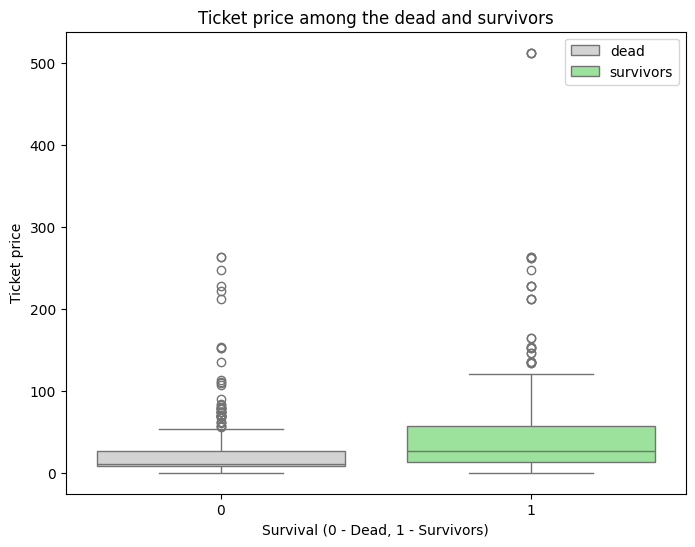

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=titanic, palette=['lightgray', 'lightgreen'])
plt.title('Ticket price among the dead and survivors')
plt.xlabel('Survival (0 - Dead, 1 - Survivors)')
plt.ylabel('Ticket price')
plt.legend(labels=['dead', 'survivors'])
plt.show()

З графіка видно, що пасажири, які заплатили вищу вартість за квиток, мали вищі шанси вижити.

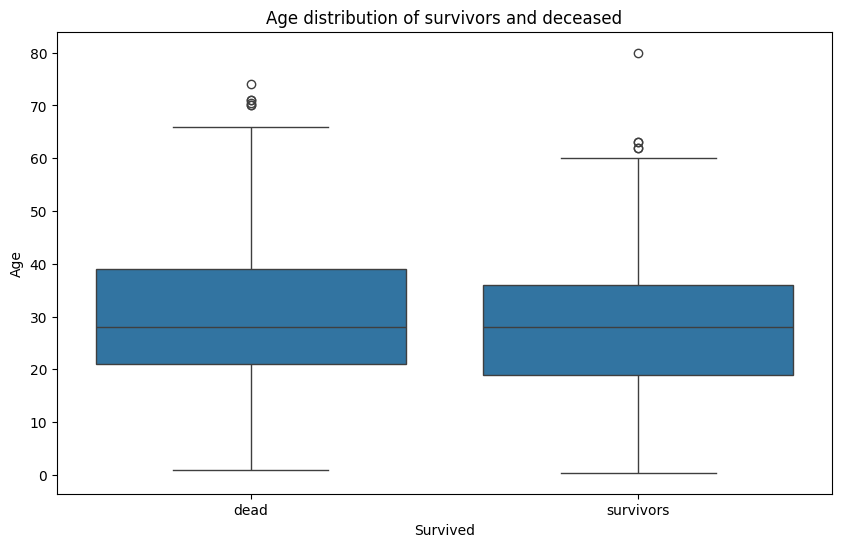

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age distribution of survivors and deceased')
plt.xticks([0,1], ['dead', 'survivors'])
plt.show()

Можна помітити, що серед виживших переважають більш молоді люди

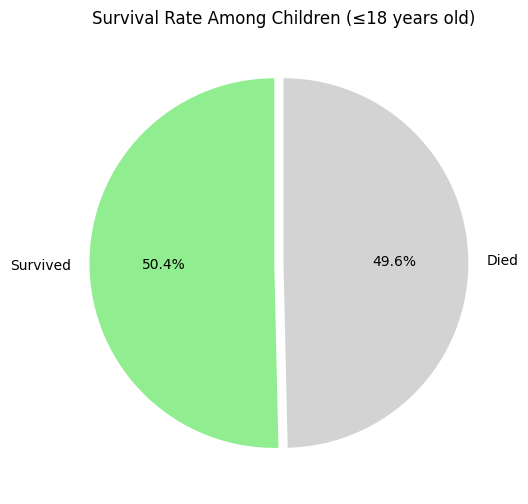

In [59]:
titanic['Child'] = titanic['Age'] <= 18
children = titanic[titanic['Child']]
child_survival = children['Survived'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(child_survival,
        labels=['Survived', 'Died'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightgray'],
        startangle=90,
        explode=(0.05, 0))

plt.title('Survival Rate Among Children (≤18 years old)')
plt.show()

Важео щось сказати, половина дітей загинула, половина - вижила, можна лише судити, що те, що ти дитина, не давало тобі більших шансів на порятунок

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

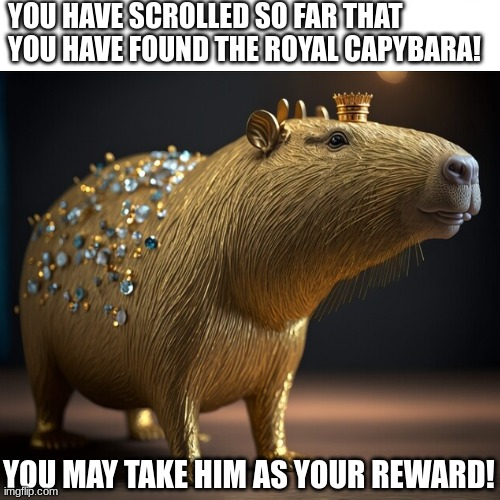